In [91]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split



In [92]:


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [93]:
df =  pd.read_csv(r'C:\Users\rohit\Desktop\Food_Supply_kcal_Data.csv')

In [94]:
df

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.027817,0.000573,0.002826,0.024418,38042000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,0.034920,0.001120,0.027607,0.006193,2858000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.019136,0.001382,0.011022,0.006732,43406000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.000220,0.000013,0.000057,0.000150,31427000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.025773,0.003093,0.019588,0.003093,97000.0,%
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,5.5410,0.8643,28.5,4.6,0.026872,0.001006,0.008305,0.017562,44939000.0,%
6,Armenia,0.2274,12.8330,1.7706,0.0,19.2658,0.7310,0.1787,2.5341,4.2235,...,3.5737,3.2164,20.9,4.3,0.224882,0.002735,0.103444,0.118704,2962000.0,%
7,Australia,1.9783,15.6146,1.9027,0.0,11.6430,0.4681,0.6040,1.6611,7.4902,...,8.3812,1.1326,30.4,<2.5,0.028113,0.000403,0.025809,0.001901,25305000.0,%
8,Austria,2.8161,15.6106,5.2532,0.0,12.3748,0.7853,0.4062,1.5976,5.0095,...,7.1622,1.0290,21.9,<2.5,0.185907,0.007210,0.169686,0.009012,8877000.0,%
9,Azerbaijan,2.2555,8.1682,1.3050,0.0,28.7417,0.5478,0.0967,1.6111,2.9322,...,1.2083,1.4661,19.9,<2.5,0.041125,0.000489,0.026010,0.014626,10023000.0,%


In [95]:
df.shape

(170, 32)

In [96]:
df.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [97]:
df.isna().sum()

Country                         0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Milk - Excluding Butter         0
Miscellaneous                   0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         3
Undernourished                  7
Confirmed                       9
Deaths                          9
Recovered                       9
Active        

In [98]:
df['Obesity'] = df['Obesity'].fillna(0)


In [99]:

def label_class(Obesity):
    
    Obesity = int(Obesity)
    
 
    if (Obesity > 0 ):
        return 1.0

    else:
        return 0.0


In [100]:
df['Obesity'] = df['Obesity'].apply(label_class)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
Country                         170 non-null object
Alcoholic Beverages             170 non-null float64
Animal Products                 170 non-null float64
Animal fats                     170 non-null float64
Aquatic Products, Other         170 non-null float64
Cereals - Excluding Beer        170 non-null float64
Eggs                            170 non-null float64
Fish, Seafood                   170 non-null float64
Fruits - Excluding Wine         170 non-null float64
Meat                            170 non-null float64
Milk - Excluding Butter         170 non-null float64
Miscellaneous                   170 non-null float64
Offals                          170 non-null float64
Oilcrops                        170 non-null float64
Pulses                          170 non-null float64
Spices                          170 non-null float64
Starchy Roots                   170 non-null flo

In [102]:

df.corr()



,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
Alcoholic Beverages,1.000000,0.588293,0.562308,0.050936,-0.550811,0.411221,0.061018,-0.028713,0.487540,0.404325,...,0.043058,-0.588213,0.115204,0.028926,-0.029428,0.343144,0.285823,0.405994,0.099626,-0.087862
Animal Products,0.588293,1.000000,0.726489,0.012725,-0.677951,0.649178,0.204655,-0.037809,0.847987,0.787617,...,0.274687,-0.999997,0.149794,0.259564,-0.108195,0.466650,0.355429,0.469953,0.243106,0.002973
Animal fats,0.562308,0.726489,1.000000,-0.000701,-0.525509,0.473411,0.032493,-0.135919,0.460383,0.484331,...,0.224721,-0.726543,0.220922,0.098590,-0.017042,0.375506,0.365941,0.381693,0.177384,-0.018557
"Aquatic Products, Other",0.050936,0.012725,-0.000701,1.000000,-0.010347,0.062013,0.160015,-0.044244,0.048250,-0.094744,...,0.059202,-0.012771,0.061038,0.163335,0.012130,-0.044910,-0.030409,-0.028832,-0.044414,0.038726
Cereals - Excluding Beer,-0.550811,-0.677951,-0.525509,-0.010347,1.000000,-0.420154,-0.236180,-0.346149,-0.607786,-0.456788,...,-0.205639,0.678048,-0.317845,-0.075220,0.095785,-0.398845,-0.337108,-0.377445,-0.232994,0.078563
Eggs,0.411221,0.649178,0.473411,0.062013,-0.420154,1.000000,0.201483,-0.070562,0.505915,0.457331,...,0.328504,-0.649258,0.259088,0.305654,-0.110985,0.431217,0.290431,0.349285,0.336875,0.136110
"Fish, Seafood",0.061018,0.204655,0.032493,0.160015,-0.236180,0.201483,1.000000,0.082014,0.204971,-0.080724,...,0.162973,-0.204489,-0.136886,-0.034858,-0.105071,0.182971,0.081262,0.172454,0.119148,0.020063
Fruits - Excluding Wine,-0.028713,-0.037809,-0.135919,-0.044244,-0.346149,-0.070562,0.082014,1.000000,0.004723,-0.017399,...,-0.032085,0.037757,-0.082835,0.033201,0.038571,0.067345,-0.010454,0.020517,0.103881,-0.082139
Meat,0.487540,0.847987,0.460383,0.048250,-0.607786,0.505915,0.204971,0.004723,1.000000,0.447966,...,0.156044,-0.848124,0.093076,0.137093,-0.201455,0.333171,0.232041,0.344126,0.166811,0.025691
Milk - Excluding Butter,0.404325,0.787617,0.484331,-0.094744,-0.456788,0.457331,-0.080724,-0.017399,0.447966,1.000000,...,0.236850,-0.787482,0.116375,0.353249,0.025515,0.386884,0.289697,0.391555,0.200143,-0.045225


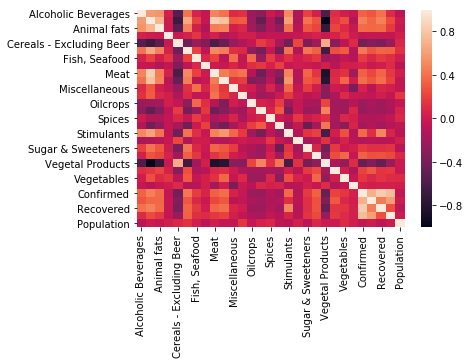

In [103]:
import seaborn as sns
sns.heatmap(df.corr())

In [104]:
import plotly.express as px
for i in range(1,24):
    fig = px.bar(x = df.iloc[df.iloc[:,i].sort_values(ascending = False)[:3].reset_index()['index'],0],y = df.iloc[:,i].sort_values(ascending = False)[:3],
                 color =df.iloc[df.iloc[:,i].sort_values(ascending = False)[:3].reset_index()['index'],0], height =300)
    fig.update_layout(title_text= df.columns[i])
    fig.show()

In [105]:
india  = df[df['Country']=='India'].iloc[:,1:22]
fig = go.Figure(
    data=[
        go.Pie(labels=india.T.index.tolist(), values=india.iloc[0,:].tolist())
    ],
    layout=go.Layout(
        title="Category distribution in India",
       
    )
)

fig.show()

In [106]:
maxCalCategory = []
for i in range(1,24):
    maxCalCategory.append(df.iloc[:,i].sort_values(ascending = False)[0])
Max = max(maxCalCategory)
Index = maxCalCategory.index(Max) +1

data = dict (
    type = 'choropleth',
    locations = df['Country'],
    locationmode='country names',
    z=df[df.columns[Index]])
go.Figure(data=[data])

In [107]:
df["AP Consumption"] = pd.cut(df["Animal Products"], [0, 10, 20, 30], labels=["low", "medium", "high"])

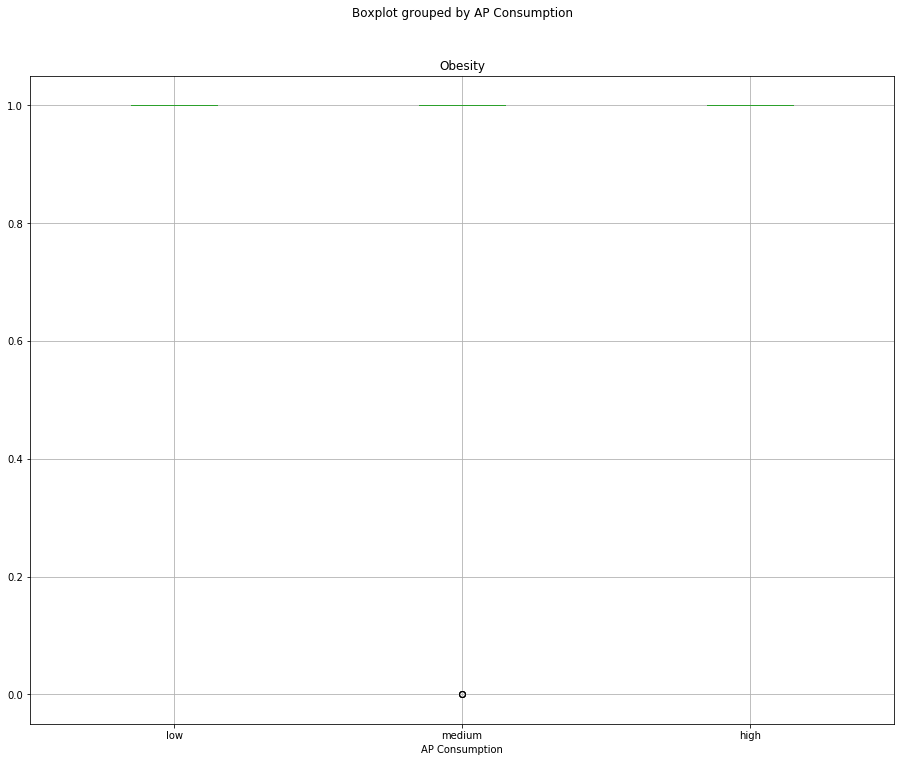

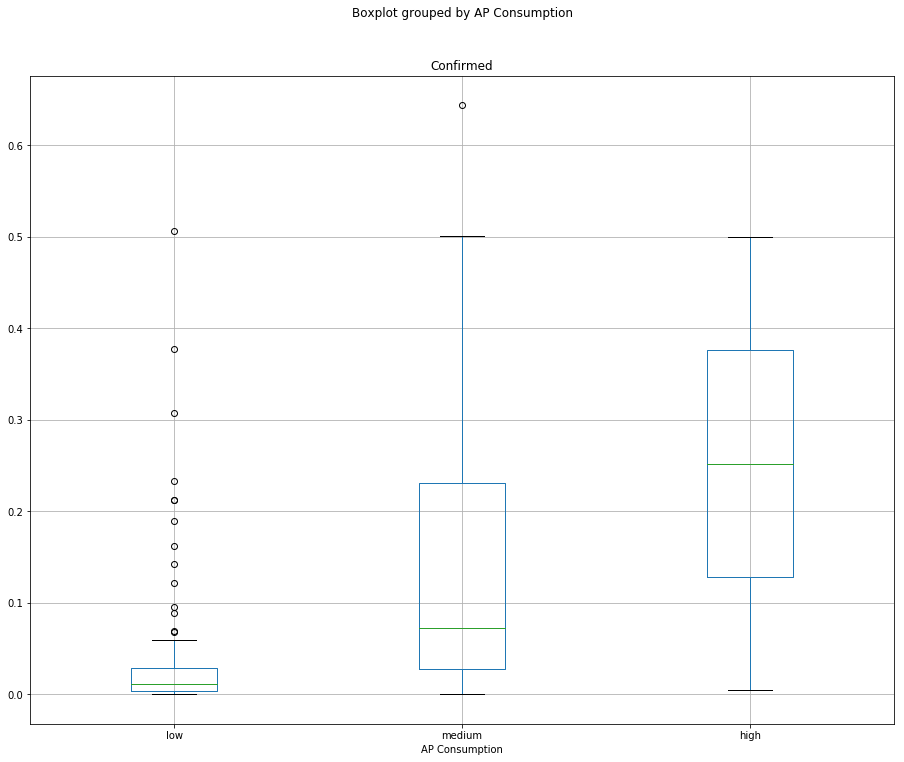

In [108]:
df.boxplot(column=["Obesity"], by="AP Consumption", figsize=(15,12))
df.boxplot(column=["Confirmed"], by="AP Consumption", figsize=(15,12))
plt.show()

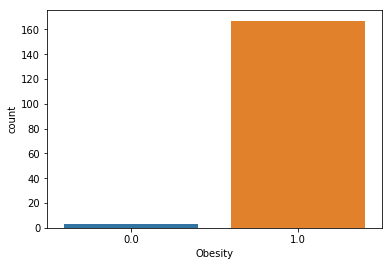

In [109]:
sns.countplot(x = df['Obesity'])

In [110]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = df.iloc[:, 1:25].values

X = StandardScaler().fit_transform(X)

In [111]:
X


array([[-1.25109094, -0.95295164, -0.32581135, ..., -1.19155282,
        -0.51975194,  0.13403012],
       [-0.39009074,  1.43422004, -0.162757  , ..., -0.94909193,
         2.57529483,  0.13403012],
       [-1.16650144, -0.68815102, -0.83856922, ...,  0.41308228,
         1.48435428,  0.13403012],
       ...,
       [-1.25109094, -1.2294607 , -0.7250484 , ..., -0.42677222,
        -1.11821429,  0.13403012],
       [-0.12527653, -1.26372107, -0.73786148, ..., -0.86484233,
        -0.9888672 ,  0.13403012],
       [ 0.09601563, -1.1305402 , -0.45081708, ...,  0.64307719,
        -1.28902671,  0.13403012]])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 33 columns):
Country                         170 non-null object
Alcoholic Beverages             170 non-null float64
Animal Products                 170 non-null float64
Animal fats                     170 non-null float64
Aquatic Products, Other         170 non-null float64
Cereals - Excluding Beer        170 non-null float64
Eggs                            170 non-null float64
Fish, Seafood                   170 non-null float64
Fruits - Excluding Wine         170 non-null float64
Meat                            170 non-null float64
Milk - Excluding Butter         170 non-null float64
Miscellaneous                   170 non-null float64
Offals                          170 non-null float64
Oilcrops                        170 non-null float64
Pulses                          170 non-null float64
Spices                          170 non-null float64
Starchy Roots                   170 non-null flo

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [116]:
from sklearn.model_selection import train_test_split

X=df[['Alcoholic Beverages', 'Vegetables', 'Vegetable Oils', 'Vegetal Products', 'Treenuts','Sugar & Sweeteners','Sugar Crops']]
y=df['Obesity']
X_train,X_test,y_train,y_test=train_test_split(X,y,
test_size=.2, random_state=42)

In [117]:
 from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 import numpy as np
QDA = QuadraticDiscriminantAnalysis

qda_model=QDA()
qda_model.fit(X_train,y_train)

C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning:

Variables are collinear



QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [119]:

print_score(qda_model, X_train, y_train, X_test, y_test, train=True)
print_score(qda_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[  2   0]
 [  0 134]]

Test Result:
Accuracy Score: 97.06%
_______________________________________________
Classification Report:	Precision Score: 97.06%
			Recall Score: 100.00%
			F1 score: 98.51%
_______________________________________________
Confusion Matrix: 
 [[ 0  1]
 [ 0 33]]

